# Data Deduplication using Clustering
**Objective**: Learn and implement data deduplication techniques.

**Task**: Hierarchical Clustering for Deduplication

**Steps**:
1. Data Set: Obtain a dataset containing duplicate employee information.
2. Perform Clustering: Use hierarchical agglomerative clustering to cluster the employee
records.
3. Evaluate Duplicates: Determine duplicates by analyzing the clusters formed.
4. Clean Data: Remove duplicate employee records found during clustering.

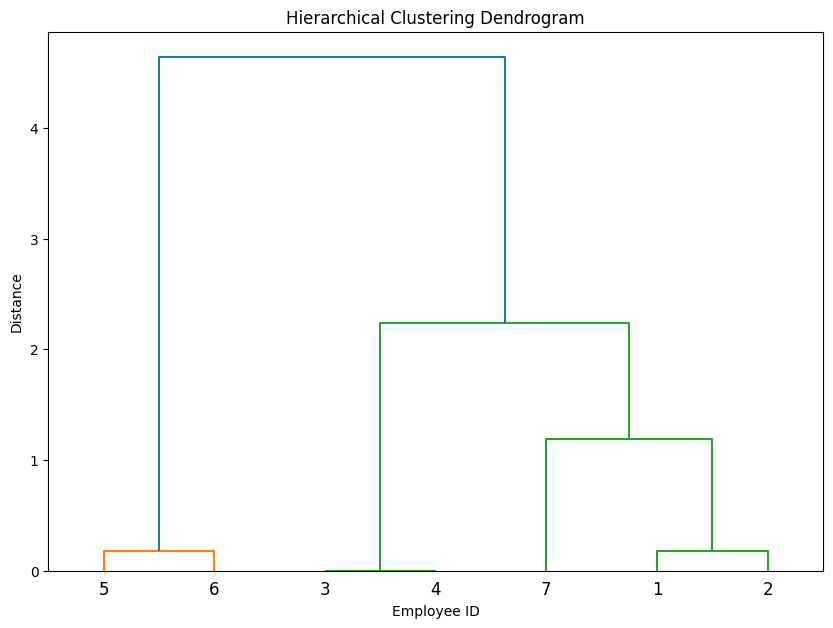

Original Data:
   EmployeeID           Name  Age  Salary  Cluster
0           1       John Doe   28   70000        3
1           2        Jon Doe   29   71000        3
2           3     Jane Smith   34   80000        2
3           4    Janet Smith   34   80000        2
4           5     Mike Brown   45   90000        1
5           6  Michael Brown   46   91000        1
6           7       Anna Lee   30   60000        3

Duplicates detected (indices): [5, 3, 1, 6]

Data after deduplication:
   EmployeeID        Name  Age  Salary  Cluster
0           1    John Doe   28   70000        3
2           3  Jane Smith   34   80000        2
4           5  Mike Brown   45   90000        1


In [3]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# 1. Sample employee dataset with duplicates
data = {
    'EmployeeID': [1, 2, 3, 4, 5, 6, 7],
    'Name': ['John Doe', 'Jon Doe', 'Jane Smith', 'Janet Smith', 'Mike Brown', 'Michael Brown', 'Anna Lee'],
    'Age': [28, 29, 34, 34, 45, 46, 30],
    'Salary': [70000, 71000, 80000, 80000, 90000, 91000, 60000]
}

df = pd.DataFrame(data)

# For deduplication, use numerical features (Age, Salary)
features = df[['Age', 'Salary']]

# 2. Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Perform hierarchical agglomerative clustering
# Using 'ward' linkage for clustering
linked = linkage(features_scaled, method='ward')

# Plot dendrogram (optional visualization)
plt.figure(figsize=(10, 7))
dendrogram(linked,
           labels=df['EmployeeID'].values,
           distance_sort='ascending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Employee ID')
plt.ylabel('Distance')
plt.show()

# 4. Choose a threshold to form flat clusters (tune this threshold)
threshold = 1.5  # Lower value means tighter clusters

clusters = fcluster(linked, threshold, criterion='distance')
df['Cluster'] = clusters

# 5. Identify duplicates within each cluster
# We assume duplicates are entries sharing the same cluster
duplicates_indices = []

for cluster_id in np.unique(clusters):
    cluster_indices = df[df['Cluster'] == cluster_id].index.tolist()
    if len(cluster_indices) > 1:
        # Mark all except the first record in cluster as duplicate
        duplicates_indices.extend(cluster_indices[1:])

# 6. Remove duplicates
df_deduplicated = df.drop(index=duplicates_indices)

print("Original Data:")
print(df)

print("\nDuplicates detected (indices):", duplicates_indices)

print("\nData after deduplication:")
print(df_deduplicated)


